# Introduction to SimPy

Recall that each simulation is made up of three type of objects: 

1. Entity
2. Resource
3. Source

In [1]:
# The first time you use simpy and simpy_helpers, you'll need to download them
# you can either download through pip in the command line / terminal, or you can
# uncomment the below lines and run from jupyter directly

# !pip install simpy
# !pip install simpy_helpers

In [30]:
#################
##   imports   ##
#################

import simpy
from simpy_helpers import Entity, Resource, Source, Stats
import numpy as np # numpy will be used for randomness and distribution methods
import matplotlib.pyplot as plt
import seaborn as sns

### 0) Specify the constants for the simulation

In [34]:
NUM_ENTITIES = 200
MEAN_TIME_BETWEEN_ARRIVALS = 50
MEAN_SERVICE_TIME = 30
SIM_LENGTH = 2000

### 1) Define the entity class

In [4]:
class runJob(Entity):
    
    def process(self):
        
        yield self.wait_for_resource(my_resource)
        yield self.process_at_resource(my_resource)

        
        self.release_resource(my_resource)
        
        # Exit the simulation 

### 2) Define the resource class

In [5]:
class myResource(Resource):
    def service_time(self, entity):
        return np.random.exponential(MEAN_SERVICE_TIME)

### 3) Define the source class

In [6]:
class generateCustomers(Source):
    
    def interarrival_time(self):
        
        return np.random.exponential(MEAN_TIME_BETWEEN_ARRIVALS)
    
    def build_entity(self):
        
        attributes = {}
        attributes['customer'] = np.random.choice(['standard', 'priority'])
        if attributes['customer'] == 'priority':
            attributes['priority'] = 0 
            
        return runJob(env, attributes) 

### 4) Run the simulation

In [7]:
# setting a random seed will ensure that our pseudo-randomness is replicable 
np.random.seed(34) 

# the environment that will run the whole simulation
env = simpy.Environment()

# create a resource object and set its capacity 
# note that myResource inherits from the Resource class from simpy_helpers
# it's the Resource class that has capacity in its constructor
my_resource = myResource(env, capacity=1) 

# 
my_source = generateCustomers(env, number=NUM_ENTITIES) 


env.process(my_source.start(debug=False)) # Set debug to false to suppress lots of output

#  Run the simulation! 
env.run() 

### 5) Using `simpy_helpers` to get statistics on the simulation 

In [8]:
Stats.get_total_times()[:5]

[30.063031988131016,
 11.289000643955664,
 16.90993520857311,
 41.30188139207428,
 42.683867286247164]

#### 5.1) Customer times

In [9]:
print(f"Customer average time in simulation = {np.mean(Stats.get_total_times()):0.5} ")
print(f"Customer average time waiting = {np.mean(Stats.get_waiting_times()):0.5} ")
print(f"Customer average time processing = {np.mean(Stats.get_processing_times()):0.5} ")

Customer average time in simulation = 98.295 
Customer average time waiting = 66.973 
Customer average time processing = 31.322 


#### 5.2) Resource times by standard/priority customer

In [10]:
print(f"Customer average time waiting (standard) = {np.mean(Stats.get_waiting_times(my_resource, attributes={'customer': 'standard'})):0.6} ")
print(f"Customer average time waiting (priority) = {np.mean(Stats.get_waiting_times(my_resource, attributes={'customer': 'priority'})):0.5} ")
print(f"Resource average processing time = {np.mean(Stats.get_processing_times(my_resource)):0.5} ")

Customer average time waiting (standard) = 85.4481 
Customer average time waiting (priority) = 40.929 
Resource average processing time = 31.322 


### 6) Plots of simulation stats

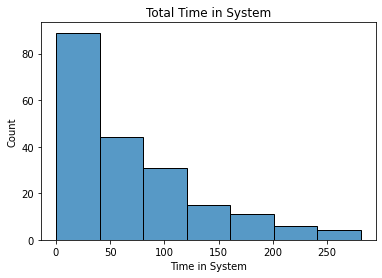

In [24]:
system_times = Stats.get_total_times()

sns.histplot(system_times,bins=7)
plt.xlabel('Time in System')
plt.title("Total Time in System");

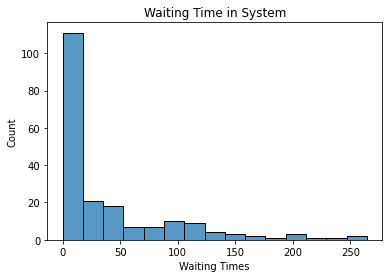

In [26]:
waiting_times = Stats.get_waiting_times()

sns.histplot(waiting_times)
plt.xlabel('Waiting Times')
plt.title("Waiting Time in System");

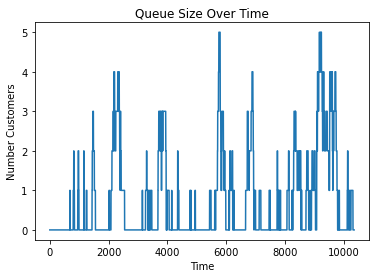

In [28]:
resource_queue = Stats.queue_size_over_time(my_resource)
sns.lineplot(y=resource_queue,x=range(0,len(resource_queue)))
plt.title("Queue Size Over Time")
plt.xlabel("Time")
plt.ylabel("Number Customers");

### 4') Run the simulation again with a different random seed

In [14]:
# setting a random seed will ensure that our pseudo-randomness is replicable 
np.random.seed(35) 

# the environment that will run the whole simulation
env = simpy.Environment()

# create a resource object and set its capacity 
# note that myResource inherits from the Resource class from simpy_helpers
# it's the Resource class that has capacity in its constructor
my_resource = myResource(env, capacity=1) 

# 
my_source = generateCustomers(env, number=NUM_ENTITIES) 


env.process(my_source.start(debug=False)) # Set debug to false to suppress lots of output

#  Run the simulation! 
env.run() 

### 5') Using `simpy_helpers` to get statistics on the simulation 

In [15]:
Stats.get_total_times()[:5]

[9.748003134375345,
 21.818367365750007,
 34.3876001105356,
 45.54295220372626,
 7.2169319963512635]

#### 5.1') Customer times

In [16]:
print(f"Customer average time in simulation = {np.mean(Stats.get_total_times()):0.5} ")
print(f"Customer average time waiting = {np.mean(Stats.get_waiting_times()):0.5} ")
print(f"Customer average time processing = {np.mean(Stats.get_processing_times()):0.5} ")

Customer average time in simulation = 68.647 
Customer average time waiting = 38.216 
Customer average time processing = 30.432 


#### 5.2') Resource times by standard/priority customer

In [17]:
print(f"Customer average time waiting (standard) = {np.mean(Stats.get_waiting_times(my_resource, attributes={'customer': 'standard'})):0.6} ")
print(f"Customer average time waiting (priority) = {np.mean(Stats.get_waiting_times(my_resource, attributes={'customer': 'priority'})):0.5} ")
print(f"Resource average processing time = {np.mean(Stats.get_processing_times(my_resource)):0.5} ")

Customer average time waiting (standard) = 54.1892 
Customer average time waiting (priority) = 18.693 
Resource average processing time = 30.432 


### 6') Plots of simulation stats

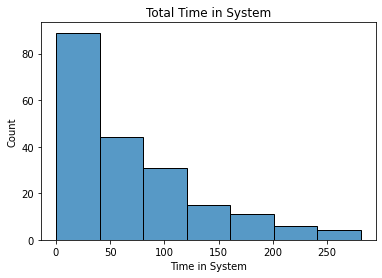

In [21]:
system_times = Stats.get_total_times()

sns.histplot(system_times,bins=7)
plt.xlabel('Time in System')
plt.title("Total Time in System");

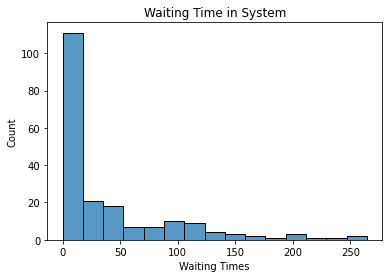

In [22]:
waiting_times = Stats.get_waiting_times()

sns.histplot(waiting_times)
plt.xlabel('Waiting Times');
plt.title("Waiting Time in System");

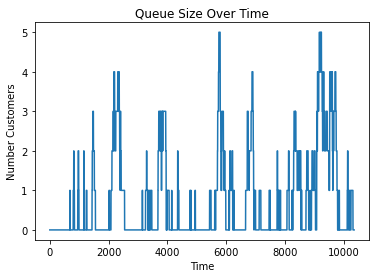

In [27]:
resource_queue = Stats.queue_size_over_time(my_resource)
sns.lineplot(y=resource_queue,x=range(0,len(resource_queue)))
plt.title("Queue Size Over Time")
plt.xlabel("Time")
plt.ylabel("Number Customers");

### Alternatively, run the simulation for a set length of time instead of by number of customers

Set `env.run(until = SIM_LENGTH)`

In [35]:
# setting a random seed will ensure that our pseudo-randomness is replicable 
np.random.seed(35) 

# the environment that will run the whole simulation
env = simpy.Environment()

# create a resource object and set its capacity 
# note that myResource inherits from the Resource class from simpy_helpers
# it's the Resource class that has capacity in its constructor
my_resource = myResource(env, capacity=1) 

# 
my_source = generateCustomers(env, number=NUM_ENTITIES) 


env.process(my_source.start(debug=False)) # Set debug to false to suppress lots of output

#  Run the simulation! 
env.run(until=SIM_LENGTH) 